# Portfolio Optimization with Markowitz Portfolio Theory

## Markowitz Portfolio Theory

Markowitz Portfolio Theory, developed by Harry Markowitz in 1952, is a foundational concept in modern finance and investment management. It provides a framework for constructing an investment portfolio that aims to achieve the highest return for a given level of risk, or equivalently, the lowest risk for a given level of return.

### Key Concepts

#### Diversification
**Principle:** Diversification helps reduce risk by combining assets that do not perfectly correlate with each other. This means that the overall risk of the portfolio is less than the sum of the risks of individual assets.

**Effect:** By holding a mix of assets, investors can potentially lower the portfolio’s volatility without sacrificing expected returns.

#### Risk and Return
**Expected Return:** The average return that an investor anticipates from an asset or portfolio.

**Risk (Volatility):** The standard deviation of returns, which measures how much the returns deviate from the expected return. Higher volatility implies higher risk.

#### Efficient Frontier
**Definition:** A graph that represents the set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return.

**Construction:** The efficient frontier is constructed by calculating the expected returns and risks of different portfolios and plotting these portfolios on a risk-return plane.

#### Optimal Portfolio
**Definition:** The portfolio on the efficient frontier that maximizes the investor’s utility function, which is typically a combination of return and risk.

**Tangency Portfolio:** The portfolio on the efficient frontier that is tangent to the Capital Market Line (CML) when a risk-free asset is included in the analysis.

#### Capital Market Line (CML)
**Definition:** A line that represents the risk-return trade-off of optimal portfolios that combine the risk-free asset with the market portfolio. The CML shows the best possible risk-return combinations available to investors.

**Equation:**

$R_p = R_f + \frac{R_m - R_f}{\sigma_m} \times \sigma_p $

where:

- \( $R_p$ \) = Expected return of the portfolio
- \( $R_f$ \) = Risk-free rate
- \( $R_m$ \) = Expected return of the market portfolio
- \( $\sigma_m$ \) = Standard deviation of the market portfolio
- \( $\sigma_p$ \) = Standard deviation of the portfolio

#### Mean-Variance Optimization
**Definition:** A mathematical framework used to determine the optimal portfolio by considering the trade-off between expected return and risk.

**Objective:** To find the portfolio weights that maximize expected return for a given level of risk or minimize risk for a given level of expected return.

### Mathematical Formulation

To construct an optimal portfolio, the following mathematical formulation is used:

#### Objective Function

\
Maximize $\mathbf{E[R]}$ of the portfolio.
\
\
Minimize $\mathbf{Var(R)}$ of the portfolio returns.


#### Constraints

\
$\text{Portfolio weights sum to 1:} \quad \sum_{i=1}^{n} w_i = 1$

No short selling or other constraints based on the investment policy.


#### Portfolio Return

$$ R_p = \sum_{i=1}^{n} w_i R_i$$

where:

- $ w_i $ = Weight of asset $ i $
- $ R_i $ = Expected return of asset $ i $

#### Portfolio Variance


$$ \sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j\text{Cov}(R_i, R_j) $$


where:

- $\text{Cov}(R_i, R_j) $ = Covariance between returns of assets $ i $ and $ j $

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
import datetime as dt
import yfinance as yf
from scipy.optimize import minimize
import scipy.stats as stats

C:\Users\andre\anaconda3\envs\env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Data Management

For this example we will use the stocks that are considered to be the "Magnificent Seven".  We will download the last 10 years of data.

In [2]:
stocks = ["AMZN","MSFT","META","GOOG","AAPL","TSLA", "NVDA"]
start = dt.datetime.today()-dt.timedelta(1825)
end = dt.datetime.today()

When calculating the Markowitz portfolio the time period of historical data used can vary depending on several factors, including the investment horizon, the frequency of data availability, and the specific requirements of the analysis.

Common Time Periods Used:
3 to 5 Years:

Typical Usage: This is a common range for investors and analysts who want a balance between having enough data to be statistically significant and staying relevant to current market conditions. A 3- to 5-year period often captures enough market cycles to provide a robust analysis without being overly influenced by short-term noise or outdated information.
1 Year:

Typical Usage: Shorter periods like 1 year may be used in more dynamic or volatile markets, or when the portfolio needs to be adjusted frequently. This period captures recent trends but may lack the robustness of longer-term data.
10 Years or More:

Typical Usage: For long-term strategic asset allocation, a 10-year or longer period might be used. This can help smooth out anomalies and account for various economic cycles, providing a comprehensive view of asset performance. However, the data might be less reflective of current market conditions, especially if significant structural changes in the market have occurred.
Monthly vs. Daily Data:

The frequency of data (daily, weekly, monthly) also affects the time period. For example, daily data over 3 years might provide similar insights as monthly data over 10 years.
Considerations:
Market Conditions: The relevance of historical data can be affected by major economic events (e.g., financial crises), technological advancements, or changes in market regulations.
Data Availability: Sometimes, the length of available data limits the period used. Newer assets or markets may not have extensive historical data.

For this example I chose 5 years to try to achieve a balance between more current market conditions and having enough data to smooth out anomalies and account for various economic cycles.

In [3]:
df = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
for ticker in stocks:
    df[ticker] = yf.download(ticker,start,end)["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,AMZN,MSFT,META,GOOG,AAPL,TSLA,NVDA
Date,,,,,,,
2019-08-12,89.246002,129.502319,184.989853,58.668739,48.554459,15.267333,3.764518
2019-08-13,91.217003,132.182251,188.063538,59.795456,50.610657,15.666667,3.878858
2019-08-14,88.148003,128.201630,179.341476,58.148331,49.104225,14.641333,3.730217
2019-08-15,88.806000,127.914589,182.215561,58.296661,48.859619,14.376000,3.697904
2019-08-16,89.628502,130.258881,183.323273,58.813076,50.012444,14.662667,3.966105


### Exploratory Data Analysis

In [5]:
mean_daily_ret = df.pct_change(1).mean()
mean_daily_ret

C:\Users\andre\AppData\Local\Temp\ipykernel_12160\1708149428.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mean_daily_ret = df.pct_change(1).mean()


AMZN    0.000750
MSFT    0.001090
META    0.001210
GOOG    0.001019
AAPL    0.001379
TSLA    0.002896
NVDA    0.003210
dtype: float64

Nvidia has the highest daily mean return over the last 10 years with Google having the lowest.

C:\Users\andre\AppData\Local\Temp\ipykernel_12160\1802539368.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sns.heatmap(df.pct_change(1).corr(), cmap='coolwarm')


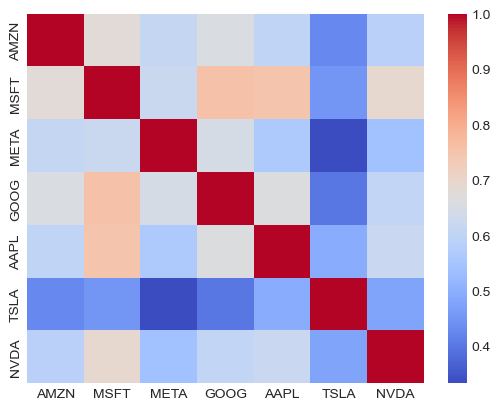

In [6]:
sns.heatmap(df.pct_change(1).corr(), cmap='coolwarm')
plt.show()

We can see that Google and Microsoft have the highest return correlation followed by Microsoft and Apple.  Tesla has the lowest correlation with the other Magnificent 7 stocks.

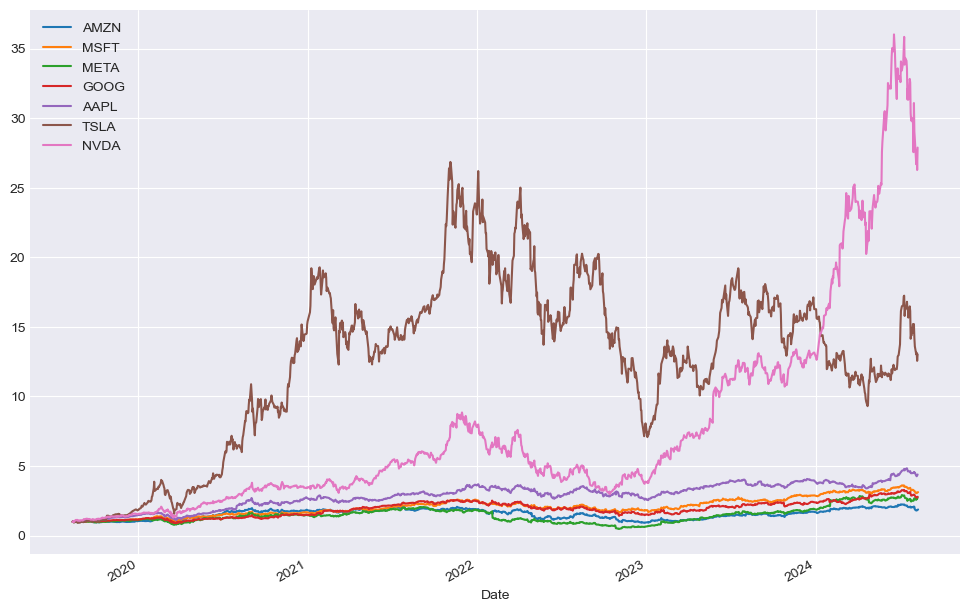

In [7]:
stock_normed = df/df.iloc[0]
stock_normed.plot(figsize=(12,8))
plt.show()

Although Apple and Microsoft generated solid returns during this period, they were overshadowed by the remarkable performance of Nvidia and Tesla.

### Data Preprocessing

In [8]:
stock_daily_ret = df.pct_change(1)
stock_daily_ret.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_12160\1572986296.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_daily_ret = df.pct_change(1)


,AMZN,MSFT,META,GOOG,AAPL,TSLA,NVDA
Date,,,,,,,
2019-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-13,0.022085,0.020694,0.016615,0.019205,0.042348,0.026156,0.030373
2019-08-14,-0.033645,-0.030115,-0.046378,-0.027546,-0.029765,-0.065447,-0.038321
2019-08-15,0.007465,-0.002239,0.016026,0.002551,-0.004981,-0.018122,-0.008663
2019-08-16,0.009262,0.018327,0.006079,0.008858,0.023595,0.019941,0.072528


In [9]:
log_ret = np.log(df/df.shift(1))
log_ret = log_ret.dropna()
log_ret.head()

,AMZN,MSFT,META,GOOG,AAPL,TSLA,NVDA
Date,,,,,,,
2019-08-13,0.021845,0.020483,0.016479,0.019023,0.041476,0.025820,0.029921
2019-08-14,-0.034224,-0.030577,-0.047488,-0.027932,-0.030217,-0.067687,-0.039074
2019-08-15,0.007437,-0.002241,0.015899,0.002548,-0.004994,-0.018288,-0.008700
2019-08-16,0.009219,0.018161,0.006061,0.008819,0.023321,0.019744,0.070018
2019-08-19,0.013052,0.016610,0.013356,0.017551,0.018472,0.030846,0.067956


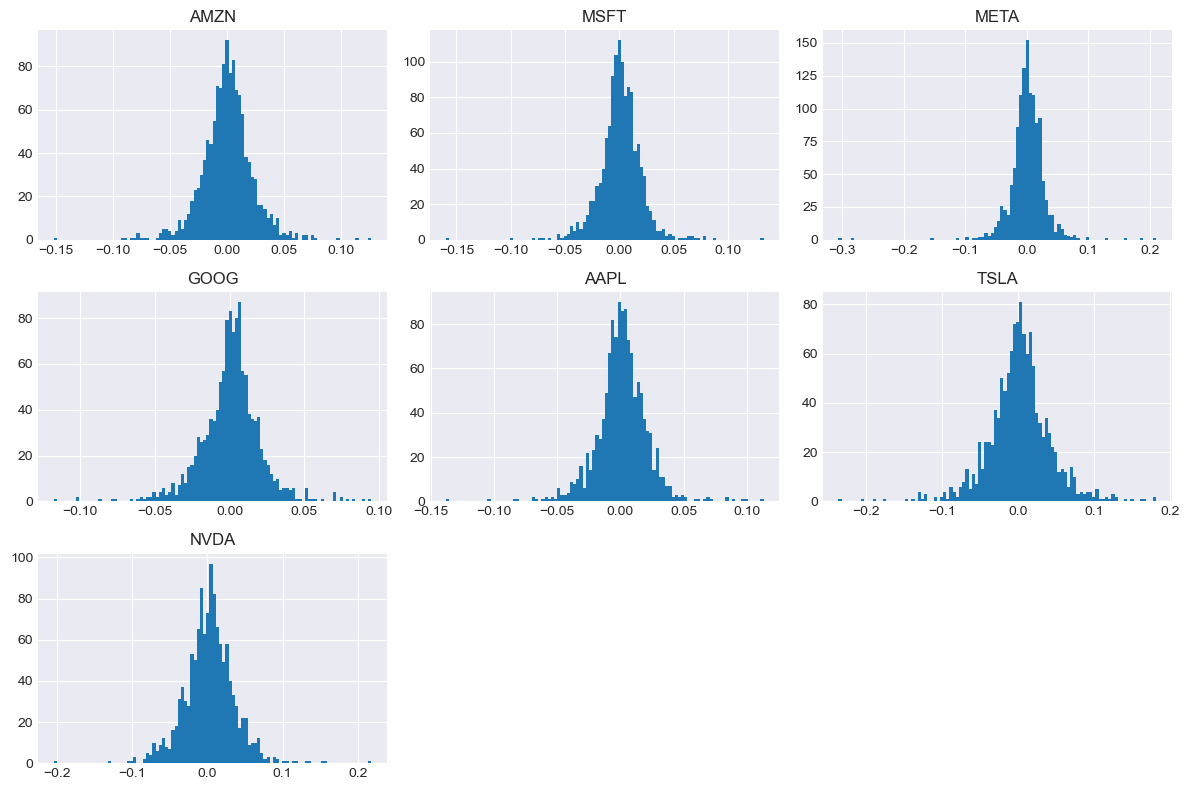

In [10]:
log_ret.hist(bins=100,figsize=(12,8));
plt.tight_layout()

The stock returns seem to follow a Normal distribution.

In [11]:
# Iterate through each column and perform normality tests
for column in log_ret.columns:
    print(f"Results for {column}:")

    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(log_ret[column])
    print(f"  Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

    # Kolmogorov-Smirnov Test
    mean, std = np.mean(log_ret[column]), np.std(log_ret[column])
    ks_test = stats.kstest(log_ret[column], 'norm', args=(mean, std))
    print(f"  Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

    # Anderson-Darling Test
    anderson_test = stats.anderson(log_ret[column], dist='norm')
    print(f"  Anderson-Darling Test: Statistic={anderson_test.statistic}")
    for i, (crit_val, sig_level) in enumerate(zip(anderson_test.critical_values, anderson_test.significance_level)):
        print(f"    Critical Value {i}: {crit_val}, Significance Level: {sig_level}")

    print("-" * 50)

Results for AMZN:
  Shapiro-Wilk Test: Statistic=0.9549240356045295, p-value=3.200073652306021e-19
  Kolmogorov-Smirnov Test: Statistic=0.0583265048060192, p-value=0.00037203976593966055
  Anderson-Darling Test: Statistic=10.02020886207265
    Critical Value 0: 0.574, Significance Level: 15.0
    Critical Value 1: 0.654, Significance Level: 10.0
    Critical Value 2: 0.785, Significance Level: 5.0
    Critical Value 3: 0.915, Significance Level: 2.5
    Critical Value 4: 1.089, Significance Level: 1.0
--------------------------------------------------
Results for MSFT:
  Shapiro-Wilk Test: Statistic=0.9343286847401411, p-value=4.379349836984211e-23
  Kolmogorov-Smirnov Test: Statistic=0.06709481425420627, p-value=2.3248206670265193e-05
  Anderson-Darling Test: Statistic=11.993351854182947
    Critical Value 0: 0.574, Significance Level: 15.0
    Critical Value 1: 0.654, Significance Level: 10.0
    Critical Value 2: 0.785, Significance Level: 5.0
    Critical Value 3: 0.915, Significan

All the p-values from the Shapiro-Wilk and Kolmogorov-Smirnov tests are very low, indicating that the log returns of the stocks do not follow a normal distribution. The Anderson-Darling test results also show significant deviation from normality across all stocks, as indicated by the high test statistics compared to the critical values.

In conclusion, the log returns of these stocks do not fit a normal distribution well based on these tests.

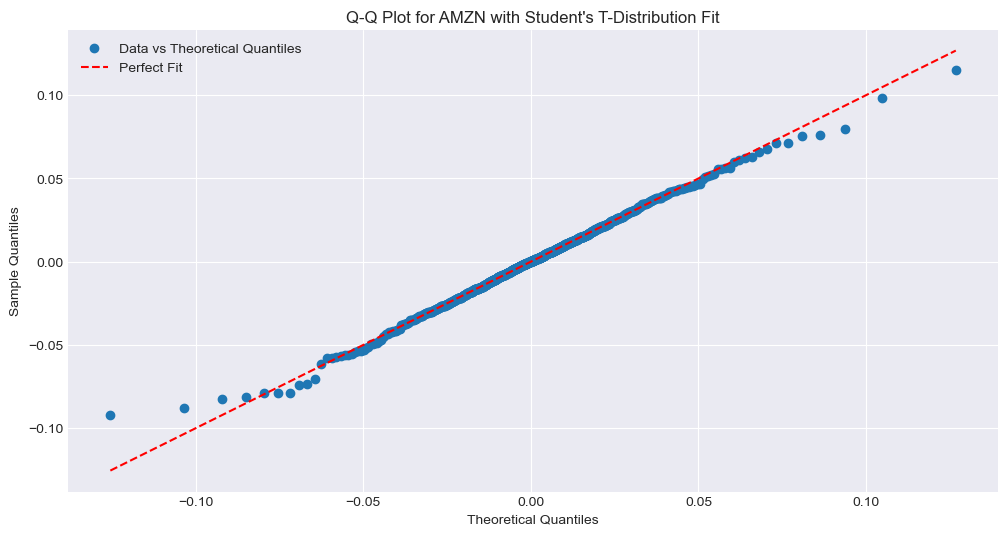

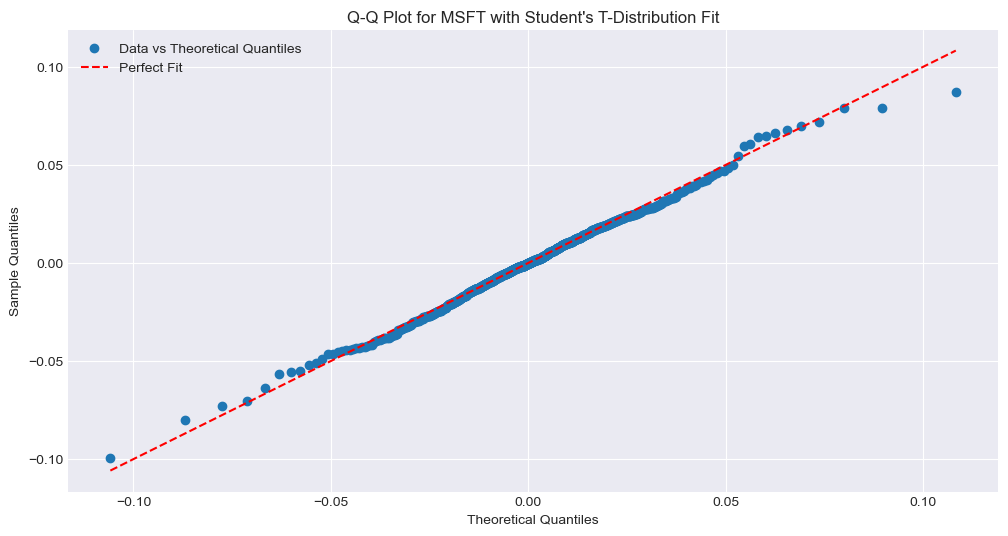

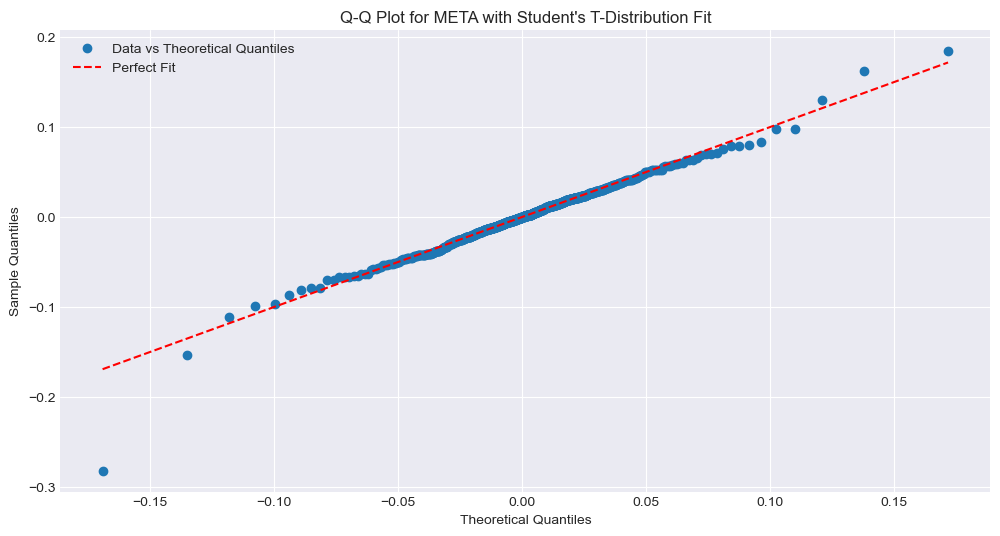

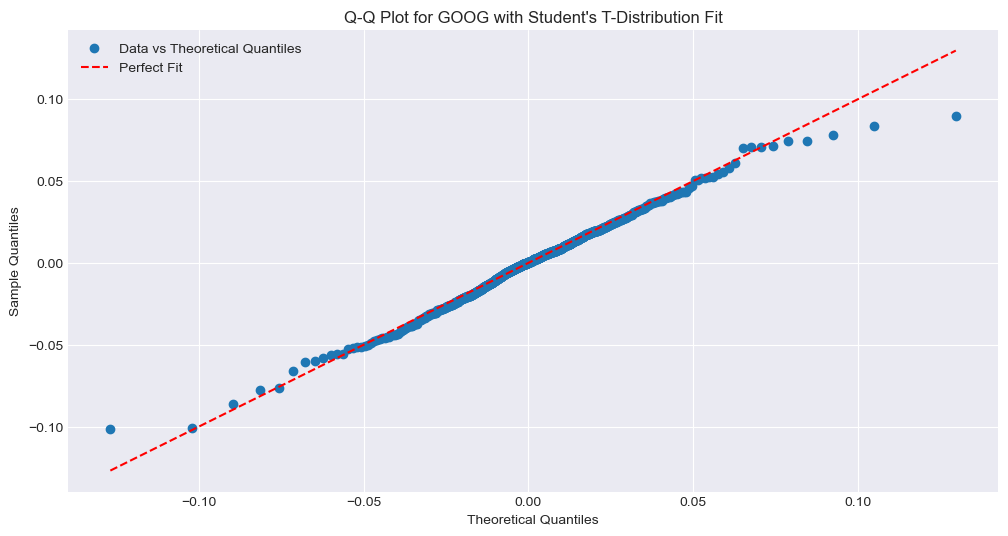

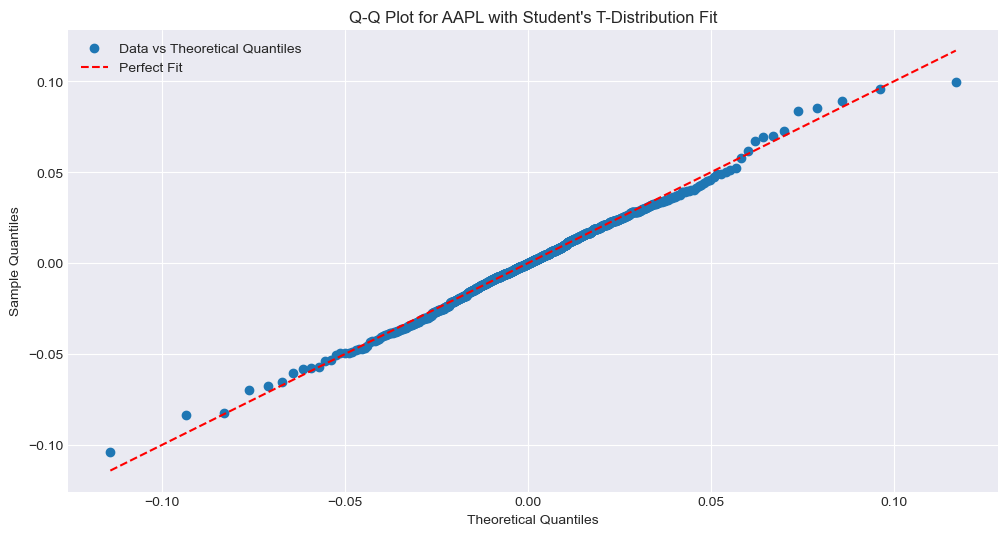

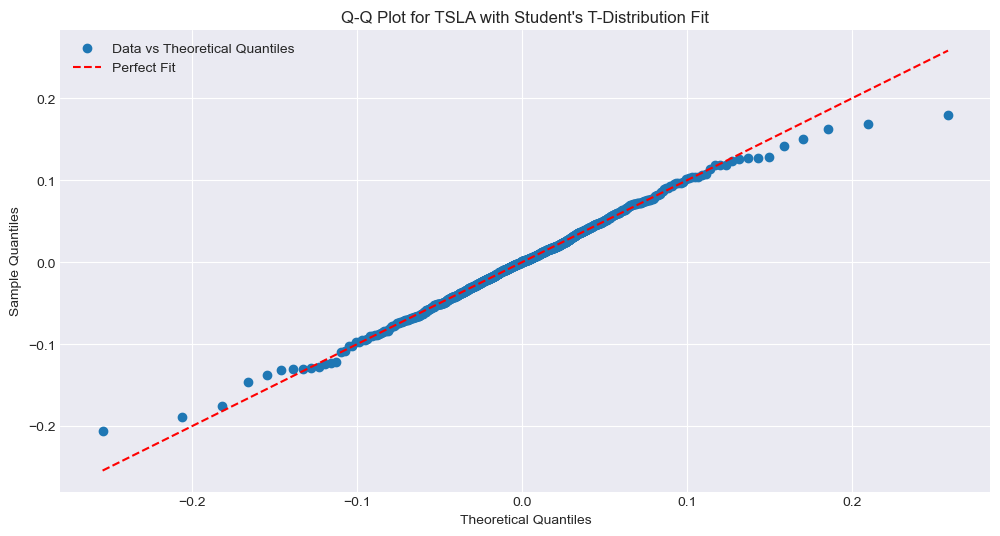

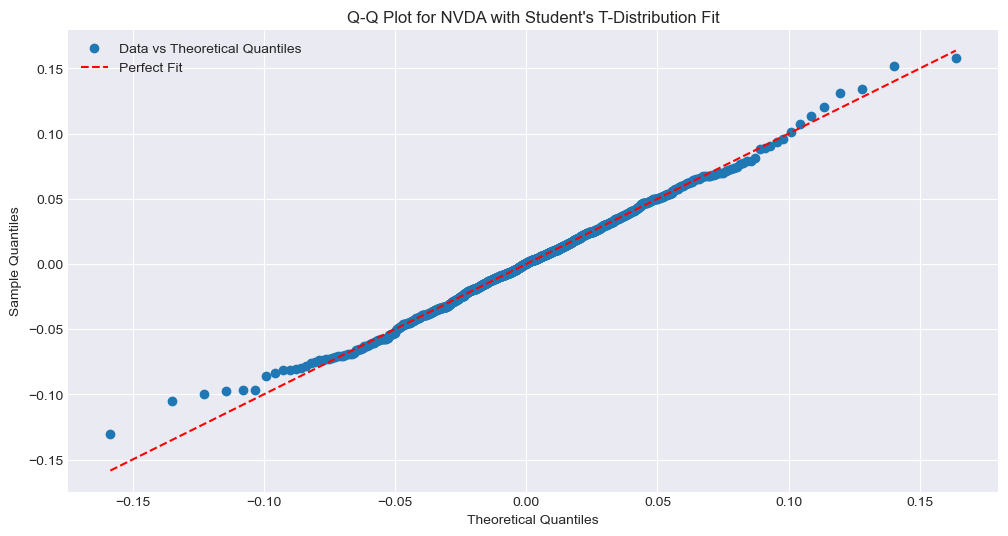

Results for AMZN:
  Degrees of Freedom: 3.8411889530375727
  Location Parameter: 0.0006461533714534241
  Scale Parameter: 0.01583970472155275
  KS Statistic: 0.011744211330737608
  KS P-Value: 0.9943882564580117
--------------------------------------------------
Results for MSFT:
  Degrees of Freedom: 3.7995261895902153
  Location Parameter: 0.0012441605582204193
  Scale Parameter: 0.01328364135671936
  KS Statistic: 0.018881422136933335
  KS P-Value: 0.754303739137365
--------------------------------------------------
Results for META:
  Degrees of Freedom: 3.2227796060296185
  Location Parameter: 0.0013136442602123082
  Scale Parameter: 0.01716328442679263
  KS Statistic: 0.018989442108828358
  KS P-Value: 0.7480949012015727
--------------------------------------------------
Results for GOOG:
  Degrees of Freedom: 3.333669413647005
  Location Parameter: 0.0014348053024191803
  Scale Parameter: 0.013529118609911881
  KS Statistic: 0.024049841947845096
  KS P-Value: 0.4547606912248683


In [12]:
# Fit and test Student's t-distribution for each stock
results = {}

for stock in log_ret.columns:
    data = log_ret[stock].dropna()
    
    # Fit the Student's t-distribution to the data
    params = stats.t.fit(data)
    dof, loc, scale = params
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p_value = stats.kstest(data, 't', args=params)
    
    # Store results
    results[stock] = {
        'df': dof,
        'loc': loc,
        'scale': scale,
        'KS Statistic': ks_stat,
        'KS P-Value': ks_p_value,
    }
    
    # Q-Q plot
    quantiles = np.linspace(0, 1, len(data))
    theoretical_quantiles = stats.t.ppf(quantiles, dof, loc, scale)
    sorted_data = np.sort(data)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(theoretical_quantiles, sorted_data, label='Data vs Theoretical Quantiles')
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Perfect Fit')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Q-Q Plot for {stock} with Student\'s T-Distribution Fit')
    plt.legend()
    plt.show()

# Print results
for stock, result in results.items():
    print(f"Results for {stock}:")
    print(f"  Degrees of Freedom: {result['df']}")
    print(f"  Location Parameter: {result['loc']}")
    print(f"  Scale Parameter: {result['scale']}")
    print(f"  KS Statistic: {result['KS Statistic']}")
    print(f"  KS P-Value: {result['KS P-Value']}")
    print("-" * 50)

Overall, the high p-values across all stocks suggest that the log returns for each stock fit the Student's t-distribution reasonably well. The KS statistic values are relatively low, further supporting that the empirical distribution of the log returns is close to the theoretical Student's t-distribution.  Stock returns are more likely to follow a t-distribution due to their fatter tails, which reflect the higher probability of extreme returns compared to a normal distribution.

In [13]:
for column in log_ret.columns:
    # Extract returns for the current stock
    returns = log_ret[column].dropna()

    # Perform a one-sample t-test to check if the mean return is different from zero
    t_statistic, p_value = stats.ttest_1samp(returns, 0)
    
    # Print the results
    print(f'Results for {column}:')
    print(f'  One-Sample T-Test: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}')
    print('-' * 60)

Results for AMZN:
  One-Sample T-Test: t-statistic = 0.7829, p-value = 0.4338
------------------------------------------------------------
Results for MSFT:
  One-Sample T-Test: t-statistic = 1.6717, p-value = 0.0948
------------------------------------------------------------
Results for META:
  One-Sample T-Test: t-statistic = 1.0011, p-value = 0.3170
------------------------------------------------------------
Results for GOOG:
  One-Sample T-Test: t-statistic = 1.4416, p-value = 0.1497
------------------------------------------------------------
Results for AAPL:
  One-Sample T-Test: t-statistic = 2.0807, p-value = 0.0377
------------------------------------------------------------
Results for TSLA:
  One-Sample T-Test: t-statistic = 1.7536, p-value = 0.0797
------------------------------------------------------------
Results for NVDA:
  One-Sample T-Test: t-statistic = 2.8138, p-value = 0.0050
------------------------------------------------------------


- Significant Differences (p < 0.05): AMZN, MSFT, GOOG, AAPL, NVDA
- Not Significant (p ≥ 0.05): META, TSLA \
For stocks with significant results, the log returns are statistically different from zero, indicating that there is a notable mean return. For stocks with non-significant results, there is no strong evidence to suggest that the mean return is different from zero.

In [14]:
log_ret.mean() * 252

AMZN    0.124272
MSFT    0.227616
META    0.203322
GOOG    0.206051
AAPL    0.296955
TSLA    0.514992
NVDA    0.667731
dtype: float64

Nvidia has a 55% yearly return over the last 10 years with the vast majority of the returns coming in the last couple years.

In [15]:
# Compute pairwise covariance of columns
log_ret.cov()

,AMZN,MSFT,META,GOOG,AAPL,TSLA,NVDA
AMZN,0.000498,0.000291,0.000387,0.000296,0.000269,0.000399,0.000443
MSFT,0.000291,0.000367,0.000338,0.000292,0.000289,0.000365,0.000445
META,0.000387,0.000338,0.000816,0.000369,0.000321,0.000395,0.000515
GOOG,0.000296,0.000292,0.000369,0.000404,0.000268,0.000336,0.000411
AAPL,0.000269,0.000289,0.000321,0.000268,0.000403,0.000417,0.000419
TSLA,0.000399,0.000365,0.000395,0.000336,0.000417,0.001706,0.000673
NVDA,0.000443,0.000445,0.000515,0.000411,0.000419,0.000673,0.001114


Key Observations:\
\
Positive Covariance:

Most off-diagonal values are positive, indicating that the returns of these stocks tend to move in the same direction. For instance, TSLA and NVDA have the highest covariance (0.000438), suggesting they are strongly positively correlated.\
\
Magnitude of Covariance:

Covariance values are relatively small compared to the variances. This suggests that while there are positive relationships between the stocks, these relationships are not as strong as the individual stock variances.\
\
Volatility Comparison:

The stock with the highest variance, TSLA, also has high covariances with other stocks, especially NVDA. This implies that TSLA's movements have a significant impact on the overall portfolio risk.\
\
Diversification Potential:

The covariance matrix helps in understanding the diversification potential of the portfolio. Stocks with lower covariance with others (like GOOG and AAPL with relatively lower values) can help reduce overall portfolio risk.

In [16]:
# Stock Columns
print('Stocks')
print(df.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(df.columns)))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['AMZN', 'MSFT', 'META', 'GOOG', 'AAPL', 'TSLA', 'NVDA'], dtype='object')


Creating Random Weights
[0.23739899 0.31500973 0.04362068 0.59291533 0.23605146 0.18302621
 0.22659991]


Rebalance to sum to 1.0
[0.12939938 0.17170277 0.02377638 0.32318114 0.12866488 0.09976234
 0.12351311]


Expected Portfolio Return
0.2986469553890998


Expected Volatility
0.3115605650499363


Sharpe Ratio
0.9585518479889561


In [17]:
num_ports = 1000000

all_weights = np.zeros((num_ports,len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(df.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

Next a Monte Carlo simulation is performed to calculate the expected return, expected volatility, and Sharpe ratio of a randomly weighted portfolio of stocks.

In [18]:
max_sharpe_ratio = sharpe_arr.max()

max_sharpe_idx = sharpe_arr.argmax()

print('Maximum Sharpe Ratio:', max_sharpe_ratio)

Maximum Sharpe Ratio: 1.2636136873661106


In [19]:
all_weights[sharpe_arr.argmax(),:]

array([0.01572477, 0.04112037, 0.0058902 , 0.00142744, 0.28089238,
       0.06654574, 0.58839911])

In [20]:
stock_names = df.columns

optimal_weights = all_weights[sharpe_arr.argmax(), :]

# Convert weights to percentages and round them
percentage_weights = [round(weight * 100, 2) for weight in optimal_weights]

# Create a dictionary mapping stock names to their respective percentage weights
portfolio_allocation = dict(zip(stock_names, percentage_weights))

print('Optimal Portfolio Allocation (in %):')
print(portfolio_allocation)

Optimal Portfolio Allocation (in %):
{'AMZN': 1.57, 'MSFT': 4.11, 'META': 0.59, 'GOOG': 0.14, 'AAPL': 28.09, 'TSLA': 6.65, 'NVDA': 58.84}


In the portfolio optimized for the maximum Sharpe ratio, Nvidia holds a significant weight of ~59%, indicating a high level of confidence in its performance. However, this heavy allocation might be considered too risky for many investors due to its potential for high volatility. Conversely, Google is assigned a minimal weight of just 0.14%, suggesting a much smaller role in the portfolio, which might not align with its strong market presence.

In [21]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print("The return at the maximum sharpe ratio is",round(max_sr_ret, 2)*100,"%")
print("The volatility at the maximum sharpe ratio is",round(max_sr_vol, 2)*100,"%")

The return at the maximum sharpe ratio is 52.0 %
The volatility at the maximum sharpe ratio is 41.0 %


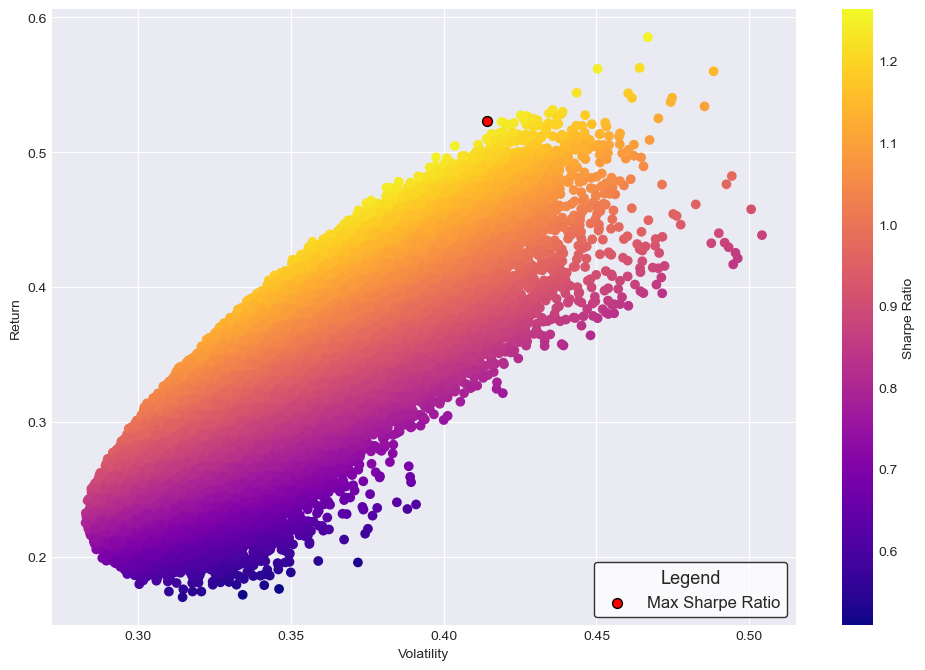

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black',  label='Max Sharpe Ratio')
plt.legend(frameon=True, facecolor='white', edgecolor='black', fontsize=12, title='Legend', title_fontsize='13', loc='lower right')
plt.show()

The red dot shows where the maximum sharpe ratio falls for all the potential allocations.

In [23]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return, volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [24]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [25]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [26]:
# Define your objective function (e.g., negative Sharpe ratio)
def objective_function(weights):
    return neg_sharpe(weights)

# Define the constraint that weights must sum to 1
constraints = ({'type': 'eq', 'fun': check_sum})

# Define the bounds for each weight
bounds = [(0, 1) for _ in range(len(df.columns))]

# Initial guess for weights
initial_weights = [1.0 / len(df.columns)] * len(df.columns) 

# Perform the optimization
result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = result.x

print("Optimal Weights:", optimal_weights)

Optimal Weights: [4.79659081e-17 0.00000000e+00 4.64840823e-17 4.60578015e-17
 1.96938290e-01 9.61425498e-02 7.06919160e-01]


In [27]:
get_ret_vol_sr(optimal_weights)

array([0.58002604, 0.45233984, 1.28227934])

In [32]:
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0.2,0.58,1000)

In [33]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [34]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,initial_weights,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

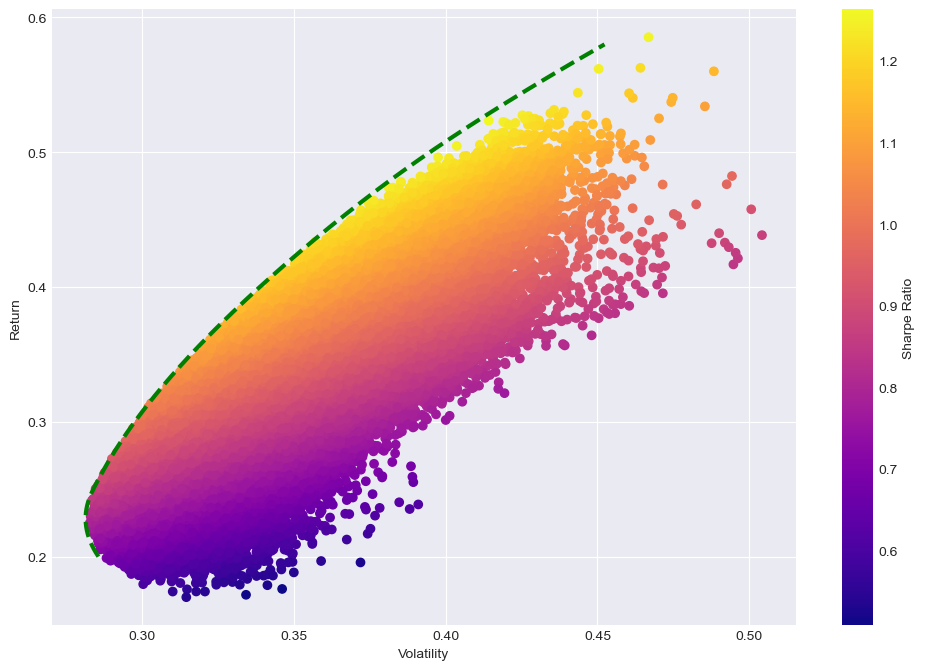

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)
plt.show()

This plot provides a comprehensive view of the risk-return trade-off in portfolio optimization. The efficient frontier, highlighted in green, offers a benchmark for constructing portfolios that maximize returns for a given level of risk. Portfolios with the highest Sharpe ratios (bright yellow) are particularly attractive, as they provide the best risk-adjusted returns.